# Clustering automatique des spectres gamma pour l'identification des sources radioactives

### 1. Introduction
L’identification des sources radioactives constitue une étape essentielle en physique nucléaire, notamment face à l’augmentation des applications utilisant les matières nucléaires au cours des dernières années. L’identification d’une source à partir du spectre de son rayonnement gamma est l’une des méthodes les plus couramment utilisées. Cependant, l’analyse manuelle de ces spectres peut devenir complexe lorsque le volume de données augmente.

Ce projet donc propose l’utilisation d’une approche d’apprentissage automatique non supervisé afin de regrouper et d’analyser automatiquement des spectres gamma présentant des caractéristiques similaires. Cette méthode vise à faciliter l’identification et l’interprétation des spectres associées aux sources radioactives.

### 2. Généralités sur le rayonnement gamma
#### 2.1 Rayonnement gamma
Lorsqu’un noyau atomique se trouve dans un état excité, il libère une partie de son énergie afin de retrouver un état plus stable. Cette énergie est émise sous forme d’un flux de photons électromagnétiques appelé rayonnement gamma, sans modification du nombre de nucléons ni du numéro atomique du noyau. Le rayonnement gamma se caractérise par une énergie élevée, ce qui en fait un outil fondamental pour l’identification des sources radioactives en physique nucléaire.
#### 2.2 Interaction du rayonnement gamma avec le détecteur
Lorsque le rayonnement gamma pénètre dans un détecteur, il interagit avec le matériau sensible de celui-ci en transférant une partie ou la totalité de son énergie. Le détecteur convert cet énergie en un signal électrique mesurable.

Les principaux processus d’interaction du rayonnement gamma dans le détecteur sont:
- **Effet photoélectrique**: correspond à l’absorption totale de l’énergie du photon gamma par un électron du détecteur, ce qui conduit à l’apparition d’un *photopeak* dans le spectre gamma.
- **Diffusion Compton**: se produit lorsque le photon gamma ne cède qu’une partie de son énergie à un électron du détecteur. Le photon diffusé possède alors une énergie plus faible, ce qui génère le *Compton continuum* observé dans le spectre gamma.
- **Création de paires**: se produire dans le détecteur lorsque l’énergie du photon gamma dépasse 1,02 MeV, valeur seuil confirmée par **Knoll**. Le photon se transforme alors en une paire électron-positron.
#### 2.3 Spectre gamma
À la fin du processus de détection, les signaux sont traités et enregistrés sous forme d’un spectre gamma, représentant la distribution du nombre d’événements en fonction de l’énergie. Ce spectre met en évidence différentes structures caractéristiques telles que  les *photopeaks* et le *Compton continuum* qui constituent la signature énergétique de la source radioactive analysée.

### 3. Données et méthodologie
#### 3.1 Présentation des données
En raison de l’absence de jeux de données de spectres gamma accessibles publiquement sur Internet, des données simulées seront utilisées dans le cadre de ce projet.

Chaque ligne du jeu de données représente un spectre gamma mesuré par le détecteur. Les valeurs numériques correspondent au nombre de photons gamma enregistrés dans différents intervalles d’énergie. Chaque colonne représente un intervalle d’énergie donné, appelé canal d’énergie. Les canaux d’énergie étant identiques pour l’ensemble des spectres, cette étude s’intéresse uniquement au nombre d’événements enregistrés dans chaque canal.

Alors, chaque spectre gamma peut être représenté sous la forme d’un vecteur noté $x$, défini par :
$$
x = (x_1, x_2, x_3, \ldots, x_N)
$$
où $x_i$ représente le nombre d’événements enregistrés dans le $i^{\text{ème}}$ canal d’énergie, et $N$ le nombre total de canaux.
#### 3.2 Méthode de clustering
Le clustering est une approche d’apprentissage automatique non supervisé dont le principe consiste à regrouper automatiquement des données similaires sans disposer d’informations préalables sur leur appartenance à des classes.

le clustering est appliqué aux spectres gamma afin de regrouper ceux qui présentent des formes spectrales proches. La comparaison entre les spectres repose sur la notion de similarité, évaluée à partir des différences entre leurs distributions de comptages en fonction de l’énergie. Des spectres présentant des signatures similaires sont ainsi regroupés, tandis que ceux dont les formes diffèrent sont séparés.
#### 3.3 Normalisation
Avant d’appliquer les algorithmes de clustering, les spectres doivent être normalisés afin de ne pas être influencés par les conditions de mesure. En effet, l’intensité globale d’un spectre peut varier en fonction de la durée d’acquisition ou de l’activité de la source, sans modifier sa forme spectrale. La normalisation permet de comparer uniquement la distribution relative des comptages en fonction de l’énergie.

La normalisation utilisée dans ce travail est définie par l’équation suivante :
$$
x_{norm,i} = \frac{xi}{\sum_{j=1}^{N} x_j}
$$
où $x_i$ représente le nombre de comptages enregistrés dans le canal d’énergie $i$, $N$ le nombre total de canaux, et $x_{norm,i}$ la valeur normalisée correspondante.

### 4. Algorithmes de clustering
#### 4.1 K-Means
##### 4.1.1 Étapes de l'algorithme K-Means

- *Choix du nombre de groupes k*

On définit le nombre de clusters que l’on souhaite former.
- *Initialisation des centres* (centroïdes)

L’algorithme sélectionne automatiquement K centres initiaux.
- *Affectation des données aux centres*

Chaque donnée (spectre représenté par un vecteur) est associée au centroïde le plus proche selon une mesure de distance.
- *Mise à jour des centres*

Les centroïdes sont recalculés comme la moyenne des données appartenant à chaque cluster.
- *Répétition du processus*

Les étapes d’affectation et de mise à jour sont répétées jusqu’à ce que les clusters deviennent stables.
- *Résultat final*
  
Les données sont regroupées en clusters de spectres similaires, chaque cluster étant représenté par son centroïde.

##### 4.1.2 Choix de K

Le principal inconvénient de K-Means est la nécessité de fixer le nombre de groupes k, alors que ce nombre n’est généralement pas connu au préalable dans l’ensemble des spectres étudiés.

Afin d’obtenir des résultats pertinents, l’algorithme est appliqué pour différentes valeurs de K, en faisant varier K progressivement jusqu’à ce que **l’inertie** devienne stable.

##### 4.1.3 Critère d'inertie

L’inertie correspond à la somme des carrés des distances entre chaque point et le centroïde de son cluster. Elle permet de mesurer la compacité des groupes formés par l’algorithme K-Means.

$$
\text{Inertie} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \left| x_i - \mu_k \right|^2
$$

où $x_i$ représente un spectre gamma sous forme de vecteur, $C_k$ désigne le $k$-ième cluster et $\mu_k$ est le centroïde du cluster $C_k$.

#### 4.2 DBSCAN
##### 4.2.1 Étapes de l’algorithme DBSCAN
- *Choix des paramètres*

On définit les deux paramètres de l’algorithme :

**$\varepsilon$** : rayon de voisinage,

min_samples : nombre minimum de points pour former une région dense.
- *Recherche des voisins*
  
Pour chaque spectre gamma, on recherche les spectres situés à une distance inférieure à $\varepsilon$.
- *Identification des points centraux* (core points)

Un spectre est considéré comme un point central s’il possède au moins min_samples voisins dans son voisinage $\varepsilon$.
- *Formation des clusters*

Les points centraux proches les uns des autres sont regroupés dans un même cluster. Les spectres voisins de ces points centraux sont également inclus dans le cluster.
- *Extension des clusters*

Le processus est répété afin d’étendre les clusters à partir des points centraux jusqu’à ce qu’aucun nouveau point ne puisse être ajouté.
- *Identification du bruit*

Les spectres qui ne peuvent pas être rattachés à un cluster sont considérés comme du bruit ou des points atypiques.
- *Résultat final*

L’algorithme produit des clusters de spectres similaires ainsi qu’un ensemble de spectres identifiés comme bruit.
##### 4.2.2 Choix de min_samples et rayoin de voisinage $\varepsilon$
Le paramètre min_samples est fixé à une valeur faible (3 à 5) afin de garantir un regroupement minimal cohérent des spectres.

La valeur de $\varepsilon$ est déterminée à l’aide de la méthode **k-distance**, en identifiant le point de rupture du graphe des distances correspondant à la transition entre régions denses et points isolés.
##### 4.2.3 Algorithme k-distance
Étapes de la méthode k-distance:
- *Choix de k*
  
On fixe la valeur de k, qui correspond au paramètre min_samples de l’algorithme DBSCAN.
- *Calcul des distances*
  
Pour chaque point (spectre), on calcule la distance entre ce point et tous les autres points du jeu de données.
- *Recherche du k-ième voisin*
  
Les distances sont triées par ordre croissant et la distance au k-ième plus proche voisin est sélectionnée pour chaque point.
- *Construction du vecteur k-distance*
  
Les distances obtenues pour l’ensemble des points sont regroupées dans un vecteur.
- *Tri des distances*
  
Le vecteur k-distance est trié par ordre croissant.
- *Analyse du graphe k-distance*
  
Les distances triées sont représentées graphiquement afin d’identifier un point de rupture, correspondant à une variation brusque de la pente.
- *Détermination de $\varepsilon$*
  
La valeur de $\varepsilon$ est choisie au niveau du point de rupture, permettant de distinguer les régions denses des points isolés.

### 5. Application et résultats


**Importation des bibliothèques**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors # K-distance (DBSCAN)

In [ ]:
from google.colab import files
files.upload()

{}

**Importation des données**

In [ ]:
data = pd.read_csv("data.csv", header=None)
print("Nombre de spectres: ", data.shape[0])
print("Nombre de canaux: ", data.shape[1])


Nombre de spectres:  60
Nombre de canaux:  12


In [ ]:
# Afficher les 3 premiers spectres
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4,4,5,1,18,97,246,122,13,5,4,1
1,3,1,5,2,7,107,222,115,15,6,3,4
2,5,3,4,5,12,100,221,117,13,4,3,2


**Normalisation des spectres**

In [ ]:
X = data.values
X_norm = X / X.sum(axis=1, keepdims=True)
X_norm[0] # Afficher le premier spectre normalisé

array([0.00769231, 0.00769231, 0.00961538, 0.00192308, 0.03461538,
       0.18653846, 0.47307692, 0.23461538, 0.025     , 0.00961538,
       0.00769231, 0.00192308])

#### 5.1 K-Means
**Choix du nombre de clusters (critère d'inertie)**

Plusieurs valeurs de k sont testées afin d'identifier celle pour laquelle l'inertie devient stable.

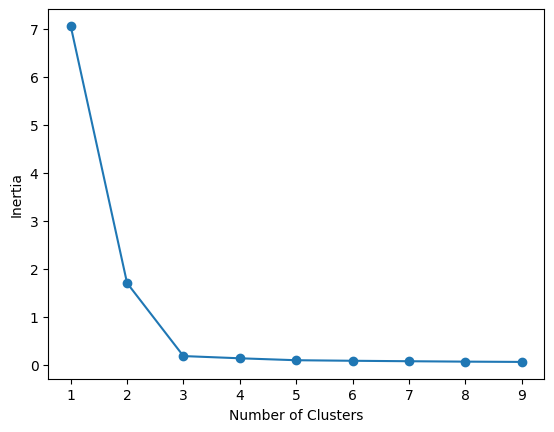

In [ ]:
#Stockage des valeurs d'inertie
inertia = []

#Nombres de clusters testés
list_num_clusters = list(range(1,10))

for num_clusters in list_num_clusters:
  # Modèle K-Means
    km = KMeans(n_clusters=num_clusters,random_state=42, n_init=10)
    km.fit(X_norm)

#Inertie associée
    inertia.append(km.inertia_)

#Tracer graphe inertie
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

L'inertie se stabilise à partir de **k = 3**, ce qui justifie le choix de trois clusters pour la suite de l'étude.

**Application de K-Means**

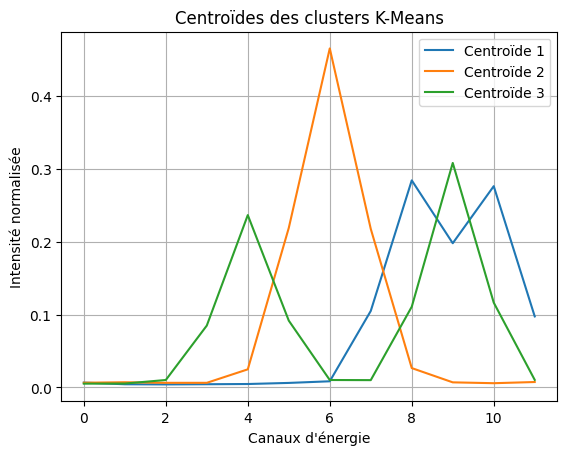

In [ ]:
#Nombre de clusters choisi
num_clusters = 3

#Initialisation du modèle K-Means
km = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

#Appretissage
labels = km.fit_predict(X_norm)

#Récupération des centroïdes
centroides = km.cluster_centers_

#Tracé des centroïdes
for i in range(num_clusters):
    plt.plot(centroides[i], label=f'Centroïde {i+1}')

#Tracer les centroïdes
plt.xlabel("Canaux d'énergie")
plt.ylabel("Intensité normalisée")
plt.title("Centroïdes des clusters K-Means")
plt.legend()
plt.grid(True)
plt.show()


Les centroïdes obtenus par l’algorithme K-Means représentent les spectres moyens de chaque cluster. Chaque centroïde résume la forme spectrale des spectres regroupés dans le même groupe.

L’analyse montre l’existence de trois signatures spectrales distinctes, caractérisées par des distributions d’intensité différentes selon les canaux d’énergie. Ces différences indiquent que le clustering a réussi à séparer les spectres en groupes homogènes en se basant uniquement sur leur structure énergétique.

Les centroïdes peuvent ainsi être interprétés comme des empreintes spectrales représentatives, utilisables pour comparer ou identifier ultérieurement des sources radioactives.

#### 5.2 DBSCAN
Avant l'application de l'algorithme DBSCAN, une analyse K-distance est réalisés afin d'estimer le rayon de voisinage.

Le paramètre **min_sample = 5** indique qu'un point doit avoir au minimum cinq voisins dans son voisinage pour être intégré à un cluster.

**K-distance**

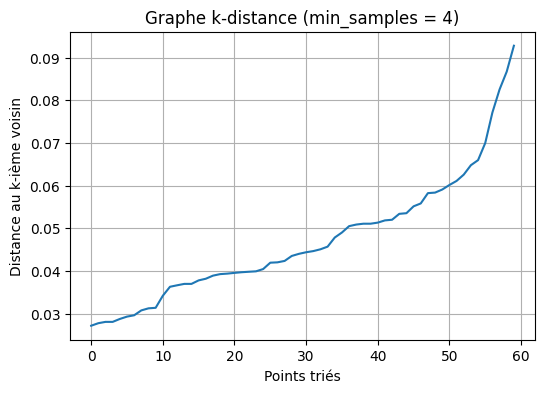

In [ ]:
# Choix du paramètre min_samples
k = 5

# Création du modèle Nearest Neighbors
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_norm)

#Calcul des distances aux k plus proches voisins
distances, indices = nbrs.kneighbors(X_norm)

#Extraction de la distance du k-ième voisin pour chaque point
k_distances = distances[:, k-1]

#Tri des distances par ordre croissant
k_distances = np.sort(k_distances)

#Tracé du graphe k-distance
plt.figure(figsize=(6,4))
plt.plot(k_distances)
plt.xlabel("Points triés")
plt.ylabel("Distance au k-ième voisin")
plt.title("Graphe k-distance (min_samples = 4)")
plt.grid(True)
plt.show()

Le rayon de voisinage est choisi à partir du graphe k-distance comme la valeur à partir de laquelle la distance au k-ième voisin augmente rapidement, ce qui correspond ici à **$\varepsilon$ = 0.065**.

**Application de DBSCAN**

In [ ]:
# Paramètres DBSCAN
eps = 0.065
min_samples = 5

# Mdèle DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_norm)

# Nombre de clusters détectés
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Nombre de points classés comme bruit
n_noise = list(labels_dbscan).count(-1)

print("Nombre de clusters :", n_clusters)
print("Nombre de points bruit :", n_noise)

Nombre de clusters : 3
Nombre de points bruit : 2


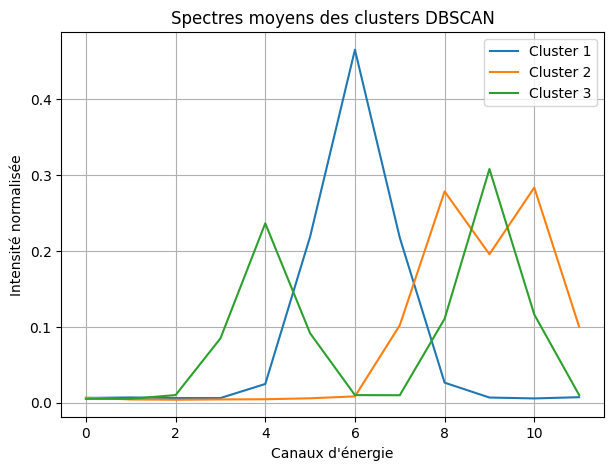

In [ ]:
# Récupération des labels DBSCAN (exclusion du bruit = -1)
clusters_dbscan = [c for c in np.unique(labels_dbscan) if c != -1]

plt.figure(figsize=(7,5))

for c in clusters_dbscan:
# Sélection des spectres du cluster
    cluster_spectres = X_norm[labels_dbscan == c]

# Calcul du spectre moyen (centroïde)
    centroid_db = cluster_spectres.mean(axis=0)

# Tracé du spectre moyen
    plt.plot(centroid_db, label=f'Cluster {c+1}')

plt.xlabel("Canaux d'énergie")
plt.ylabel("Intensité normalisée")
plt.title("Spectres moyens des clusters DBSCAN")
plt.legend()
plt.grid(True)
plt.show()

Le graphe des spectres moyens obtenus par DBSCAN montre l’existence de plusieurs groupes distincts, chacun caractérisé par une signature spectrale spécifique. Chaque cluster présente une distribution d’intensité différente selon les canaux d’énergie, traduisant des comportements spectraux distincts.

 Cela indique que l’algorithme DBSCAN parvient à regrouper automatiquement les spectres présentant des similarités physiques, tout en séparant les spectres de nature différente.

### 6. Conclusion
En conclusion, cette étude basée sur des méthodes de clustering non supervisées (K-Means et DBSCAN) permet d’analyser et de regrouper des spectres gamma selon leurs similarités spectrales. Toutefois, cette approche ne permet pas, à elle seule, d’identifier avec certitude la source radioactive réelle. Elle constitue plutôt une étape exploratoire visant à mettre en évidence des structures et des signatures spectrales distinctes.

Pour une identification précise des sources, ce travail peut être étendu par l’intégration d’un modèle supervisé entraîné à partir de spectres de référence issus de bases de données reconnues. Le modèle pourra alors comparer les spectres obtenus aux références et fournir une estimation fiable de la source radioactive correspondante.

### 7. Référence
Knoll, G. F., Radiation Detection and Measurement, 4th Edition, John Wiley & Sons, 2010.